<a href="https://colab.research.google.com/github/smesindianou/homeworks/blob/main/3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# `Δουλειά με emolex. Επίσης δεν χρησιμοποιήθηκε όλη, αλλά ήταν σημαντική για την κατανόηση των δεδομένων. `

In [ ]:
import pandas as pd
%matplotlib inline
import numpy as np
import glob
from sklearn.feature_extraction.text import CountVectorizer
from datetime import datetime
import spacy

In [ ]:
# !python -m spacy download el_core_news_sm

In [ ]:
nlp = spacy.load('el_core_news_sm')

In [ ]:
filepath = "https://raw.githubusercontent.com/datajour-gr/DataJournalism/main/Bachelor%20Lessons%202023/Lesson%2010/NRC_GREEK_Translated_6_2020.csv"

In [ ]:
emolex_df = pd.read_csv(filepath)
emolex_df.head()

,word,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
0,αφεση,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ενορκη βεβαιωση,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,εχοντας,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,εχω,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,οριο,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
emolex_df[emolex_df.duplicated(subset=['word'])]

,word,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
9485,σταυρος,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
9768,συνηγορος,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10281,καστρο,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10284,παρελθον,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10526,τυπος,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10930,φιλονικια,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
11871,ολοκληρωθηκε,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12078,πρεσβυτεροι,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
12392,γνωση,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12672,κυρος,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [ ]:
emolex_df = emolex_df.drop_duplicates(subset=['word'])
emolex_df = emolex_df.dropna()
emolex_df.reset_index(inplace = True, drop=True)

DATA

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/ΓΥΝΑΙΚΟΚΤΟΝΙΑ_Ε_P/all/all_data.csv')

In [ ]:
data.columns

Index(['date', 'text', 'section', 'Μέσο', 'year_month', 'year', 'month'], dtype='object')

In [ ]:
data_short = data[['date', 'text']]

In [ ]:
data_short['date'] = pd.to_datetime(data_short['date'])

In [ ]:
data_short['text'] = data_short['text'].str.replace(r'https?:\/\/.*[\r\n]*'," ", regex=True)

In [ ]:
vec = CountVectorizer(analyzer = 'word', vocabulary = emolex_df.word,
                      lowercase=False,
                      strip_accents = 'unicode',
                      stop_words= list(nlp.Defaults.stop_words),
                      ngram_range=(1, 2))

In [ ]:
matrix = vec.fit_transform(data_short['text'])
vocab = vec.get_feature_names_out()
wordcount_df = pd.DataFrame(matrix.toarray(), columns=vocab)
wordcount_df.head()

,αφεση,ενορκη βεβαιωση,εχοντας,εχω,οριο,ορμος,υδρα,αγια τραπεζα,αμην,απατσι,...,κλητηριο ενταλμα,κατειργασμενος,μαγια,κιτρινο,κιτρινιζω,ουρλιασμα,κροκος αυγου,νεοτερος,ζεφυρος,ζουμ
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
wordcount_df.shape

(1390, 13161)

In [ ]:
# wordcount_df[wordcount_df['εχω']>1]

In [ ]:
# Φτιάξε μια λίστα με positive words
positive_words = emolex_df[emolex_df.Positive == 1]['word']

# Φτιάξε μια λίστα με negative words
negative_words = emolex_df[emolex_df.Negative == 1]['word']

# Φτιάξε μια λίστα με anger words
angry_words = emolex_df[emolex_df.Anger == 1]['word']

# Φτιάξε μια λίστα με anticipation words
anticipation_words = emolex_df[emolex_df.Anticipation == 1]['word']

# Φτιάξε μια λίστα με disgust words
disgust_words = emolex_df[emolex_df.Disgust == 1]['word']

# Φτιάξε μια λίστα με fear words
fear_words = emolex_df[emolex_df.Fear == 1]['word']

# Φτιάξε μια λίστα με joy words
joy_words = emolex_df[emolex_df.Joy == 1]['word']

# Φτιάξε μια λίστα με sadness words
sadness_words = emolex_df[emolex_df.Sadness == 1]['word']

# Φτιάξε μια λίστα με surprise words
surprise_words = emolex_df[emolex_df.Surprise == 1]['word']

# Φτιάξε μια λίστα με trust words
trust_words = emolex_df[emolex_df.Trust == 1]['word']

In [ ]:
data_short['anger'] = wordcount_df[angry_words].sum(axis=1)

data_short['positive'] = wordcount_df[positive_words].sum(axis=1)

data_short['joy'] = wordcount_df[joy_words].sum(axis=1)

data_short['disgust'] = wordcount_df[disgust_words].sum(axis=1)

data_short['surprise'] = wordcount_df[surprise_words].sum(axis=1)

data_short['trust'] = wordcount_df[trust_words].sum(axis=1)

data_short['anticipation'] = wordcount_df[anticipation_words].sum(axis=1)

data_short['sadness'] = wordcount_df[sadness_words].sum(axis=1)

data_short['negative'] = wordcount_df[negative_words].sum(axis=1)

data_short['fear'] = wordcount_df[fear_words].sum(axis=1)

In [ ]:
data_short

,date,text,anger,positive,joy,disgust,surprise,trust,anticipation,sadness,negative,fear
0,2025-06-04,Γυναικοκτονία Κυριακής Γρίβα: Διεκόπη για τις ...,9,8,5,6,4,6,4,6,13,7
1,2025-06-04,Γυναικοκτονία Κυριακής Γρίβα: Για τις 30 Ιουνί...,16,11,7,9,2,14,11,9,19,8
2,2025-06-03,Διπλή γυναικοκτονία στην Κηφισιά: 25 σφαίρες γ...,32,31,7,20,6,26,19,23,48,35
3,2025-06-03,Γυναικοκτονία Κυριακής Γρίβα: Ηχητικό ντοκουμέ...,9,4,1,9,8,3,2,7,13,6
4,2025-06-01,Άγιοι Ανάργυροι: Την Τετάρτη στις δικαστικές α...,22,20,9,16,5,14,5,11,37,16
...,...,...,...,...,...,...,...,...,...,...,...,...
1385,2019-11-19,Γυναικοκτονίες: Μια παγκόσμια και επίμονη μάστ...,9,15,5,10,5,9,11,10,18,11
1386,2019-05-25,"Λέσβος: Δεν ήταν έγκλημα πάθους, ήταν μια ακόμ...",5,2,1,3,2,2,1,3,5,2
1387,2019-01-17,Γλωσσαμύντορες και γυναικοκτόνοι Το ανθρώπινο...,14,17,8,8,5,16,9,8,24,10
1388,2018-12-14,«Γυναικοκτονία» ή τα όρια της γραφικότητας Ότ...,14,18,5,11,5,11,9,13,25,12


In [ ]:
data_short.reset_index(inplace=True)
data_short.set_index('date', inplace=True)
data_short

,index,text,anger,positive,joy,disgust,surprise,trust,anticipation,sadness,negative,fear
date,,,,,,,,,,,,
2025-06-04,0,Γυναικοκτονία Κυριακής Γρίβα: Διεκόπη για τις ...,9,8,5,6,4,6,4,6,13,7
2025-06-04,1,Γυναικοκτονία Κυριακής Γρίβα: Για τις 30 Ιουνί...,16,11,7,9,2,14,11,9,19,8
2025-06-03,2,Διπλή γυναικοκτονία στην Κηφισιά: 25 σφαίρες γ...,32,31,7,20,6,26,19,23,48,35
2025-06-03,3,Γυναικοκτονία Κυριακής Γρίβα: Ηχητικό ντοκουμέ...,9,4,1,9,8,3,2,7,13,6
2025-06-01,4,Άγιοι Ανάργυροι: Την Τετάρτη στις δικαστικές α...,22,20,9,16,5,14,5,11,37,16
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-11-19,1385,Γυναικοκτονίες: Μια παγκόσμια και επίμονη μάστ...,9,15,5,10,5,9,11,10,18,11
2019-05-25,1386,"Λέσβος: Δεν ήταν έγκλημα πάθους, ήταν μια ακόμ...",5,2,1,3,2,2,1,3,5,2
2019-01-17,1387,Γλωσσαμύντορες και γυναικοκτόνοι Το ανθρώπινο...,14,17,8,8,5,16,9,8,24,10


<Axes: xlabel='date'>

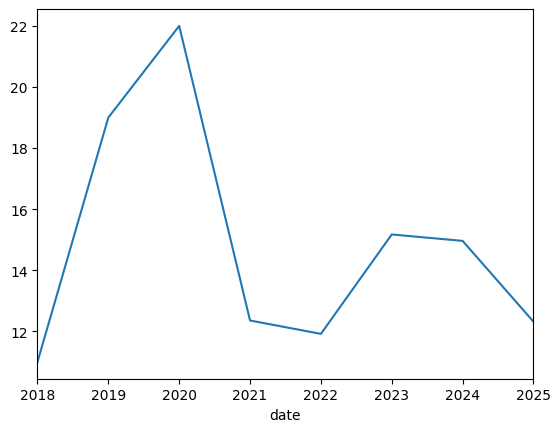

In [ ]:
data_short['positive'].resample('Y').mean().plot()

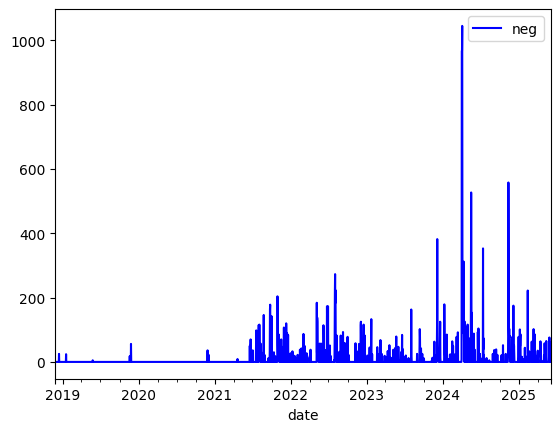

In [ ]:
data_short['negative'].resample('D').sum().plot(color = 'b',label = 'neg').legend()

<Axes: xlabel='date'>

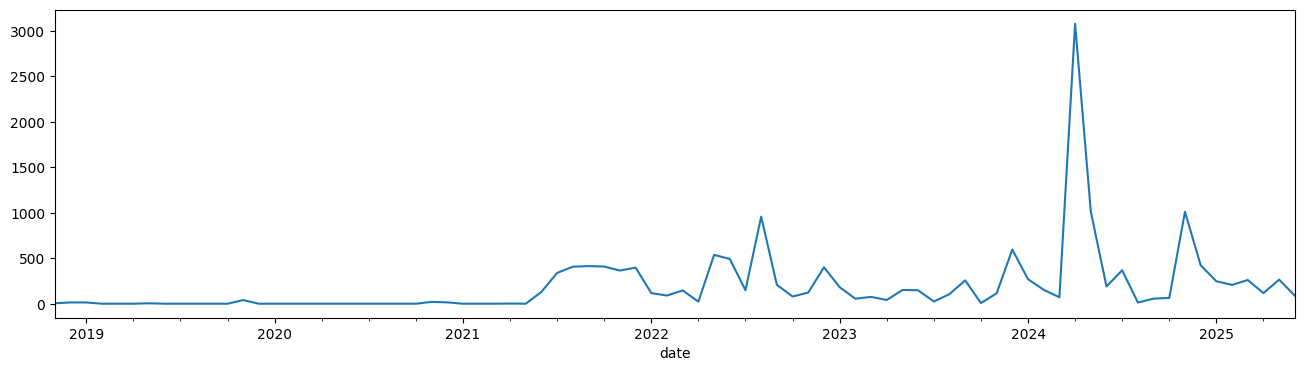

In [ ]:
data_short['anger'].resample('M').sum().plot(figsize=(16,4))

<Axes: xlabel='date'>

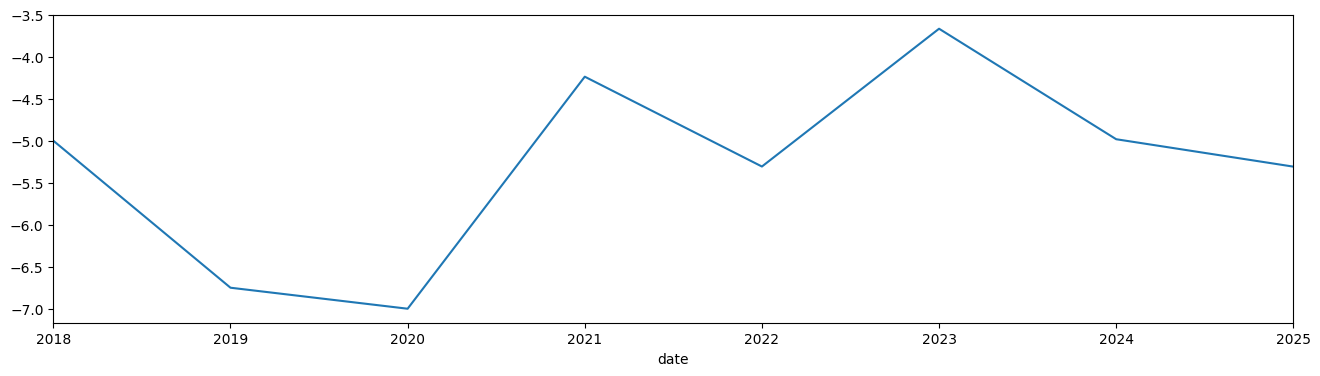

In [ ]:
data_short['pos/neg'] = data_short['positive'] - data_short['negative']
data_short['pos/neg'].resample('Y').mean().plot(figsize=(16,4))

In [ ]:
### χρησιμοποιήθηκε αυτό το γράφημα

<Axes: xlabel='date'>

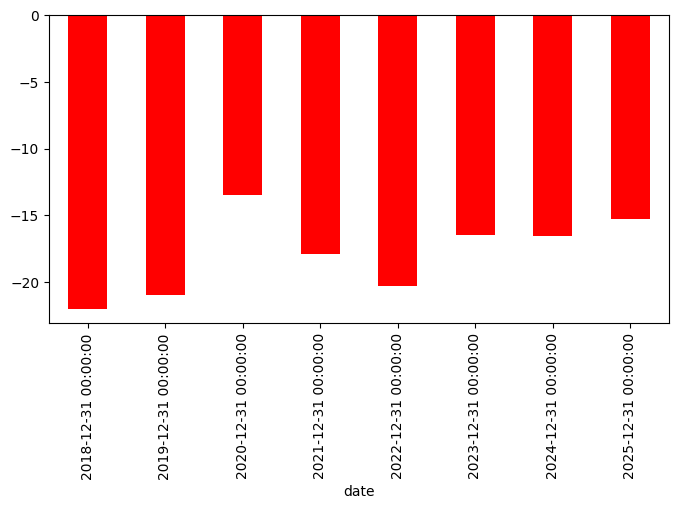

In [ ]:
data_short['(-)αρνητικότητα | θετικότητα(+)'] = data_short.positive*100//data_short[['positive','negative']].sum(
        axis=1) - data_short.negative*100//data_short[['positive','negative']].sum(axis=1)

data_short['(-)αρνητικότητα | θετικότητα(+)'].resample('Y').mean().plot(kind='bar',
                                                                               color=(data_short['(-)αρνητικότητα | θετικότητα(+)'].resample('D').mean()>0
                                                                               ).map({True: 'g', False: 'r'}), figsize=(8,4))

In [ ]:
data_short[(data_short['(-)αρνητικότητα | θετικότητα(+)'] == data_short['(-)αρνητικότητα | θετικότητα(+)'].max()) |
                  (data_short['(-)αρνητικότητα | θετικότητα(+)'] == data_short['(-)αρνητικότητα | θετικότητα(+)'].min())
                  ][['index', 'positive', 'negative', '(-)αρνητικότητα | θετικότητα(+)']]

,index,positive,negative,(-)αρνητικότητα | θετικότητα(+)
date,,,,
2025-02-13,80,0,1,-100
2024-12-09,114,0,4,-100
2024-08-12,245,2,0,100
2024-07-16,249,0,2,-100
2024-06-21,276,0,2,-100
2024-04-03,545,0,1,-100
2024-02-20,628,0,8,-100
2024-02-16,632,0,2,-100
2024-01-10,652,0,1,-100


In [ ]:
### οι αλλαγές με τη δημιουργία των στηλών για τα συναισθήματα δεν αποθηκεύτηκαν σε csv